# An analysis of technological growth in the Solow model


## Table of Contents
- [The Basic Solow Model](#the-basic-solow-model)
    - [Basic Solow Model: Analytical solution](#basic-solow-model-analytical-solution)
    - [Basic Solow Model: Numerical solution](#basic-solow-model-numerical-solution)
- [The Extended Solow Model](#the-extended-solow-model)
    - [The Extended Solow Model: analytical solution](#the-extended-solow-model-analytical-solution)
    - [The Extended Solow Model: numerical solution](#the-extended-solow-model-numerical-solution)
- [Comparative analysis of convergence towards steady state](#comparative-analysis-of-convergence-towards-steady-state)
- [Conclusion and discussion](#conclusion-and-discussion)


In [54]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sp
from IPython.display import display, Markdown
from scipy.optimize import root_scalar

The project outlines the Solow model's fundamentals and how the steady-state is derived both analytically and numerically. The solutions are compared in a basic and extended version of the Solow model. In the extended model there is technological growth. To see the effect of the extension we vary the technological growth rate (g) and see the effect on the economy output. Additionally, we look at the effect of exogenous changes to the savings rate (s).

# The Basic Solow Model

To derive the analytical solution for the basic Solow model without technological growth, we concentrate on the steady state of capital per worker ($k^*$), using the model's fundamental equations. We'll simplify by setting the technological growth rate ($g$) to zero and normalize the technological level to 1 (as seen in the production function with no A). From the steady state level of capital per worker we find the steady state of GDP/capita ($y^*$) - which we can later use for comparative analysis when changes to parameters such as the savings rate are made.

### Fundamental Equations of the Solow Model:
1. **Production Function**:
   $$
   Y = K^\alpha L^{1-\alpha}
   $$
   Here, $Y$ represents total output, $K$ is capital, $L$ is labor, and $\alpha$ (0 < $\alpha$ < 1) is the elasticity of output with respect to capital.

2. **Capital Accumulation Equation**:
   $$
   \dot{K} = sY - \delta K
   $$
   where $s$ denotes the savings rate, and $\delta$ is the rate of capital depreciation.

3. **Population Growth**:
   $$
   L_{t+1} = (1+n) L_t,\, -1 < n
   $$
   where $n$ is the growth rate of the labor force.

4. **Capital per Worker** ($k = \frac{K}{L}$):
   The dynamics of capital per worker are captured by:
   $$
   \dot{k} = \frac{\dot{K}}{L} - \frac{K\dot{L}}{L^2} = sk^\alpha - (n + \delta) k
   $$

### Solution for the Steady State ($k^*$):
To find the steady state, where $\dot{k} = 0$, we solve:
$$
0 = sk^\alpha - (n + \delta) k
$$
This can be rearranged as:
$$
sk^\alpha = (n + \delta) k
$$
$$
k^{\alpha-1} = \frac{n + \delta}{s}
$$
$$
k^* = \left(\frac{s}{n + \delta}\right)^{\frac{1}{1-\alpha}}
$$

This $k^*$ represents the steady-state level of capital per worker, where investments (savings from output) just balance out depreciation and labor force expansion.

### Output per Worker in Steady State ($y^*$):
Utilizing the per-worker production function $y = k^\alpha$ we find the steady state for GDP/capita - which clearly depends positively on the savings rate (as will be confirmed in the analysis of parameter changes to s):
$$
y^* = (k^*)^\alpha = \left(\left(\frac{s}{n + \delta}\right)^{\frac{1}{1-\alpha}}\right)^\alpha = \left(\frac{s}{n + \delta}\right)^{\frac{\alpha}{1-\alpha}}
$$



# Basic Solow Model: Analytical solution

**Analytical Solution for the Basic Solow Model**
Above we have derived the analytical steady state solution for capital and output per worker.

Here we proceed to defines mathematical symbols for the key economic parameters and variables using the sympy library. This helps us co


The code defines mathematical symbols for key economic parameters and variables using the sympy library. onstructs a steady-state equation for capital accumulation by equating current capital per worker to its next period value, adjusted for savings, depreciation, and population growth. It solves this equation to find the long-term equilibrium level of capital per worker.
$$
k^* = \left(\frac{s}{n + \delta}\right)^{\frac{1}{1-\alpha}}
$$ 


In [55]:
# Initialization of symbols for model parameters
alpha, s, delta, n, k = sp.symbols('alpha s delta n k')

# Definition of per capita production function
y = k**alpha

# Derivation of the steady state capital per capita equation
steady_state_eq = sp.Eq(k, s * y / (delta + n))

# Analytical solution of the steady state equation for k
steady_state_solution = sp.solve(steady_state_eq, k)

# Displaying the steady state equation using LaTeX in Markdown
display(Markdown('### Steady State Equation:'))
display(steady_state_eq)

# Displaying the steady state solution with the k^* notation using LaTeX in Markdown
display(Markdown('### Steady State Solution:'))
display(Markdown(f'$$ k^* = {sp.latex(steady_state_solution[0])} $$'))  # Assuming there's at least one solution



### Steady State Equation:

Eq(k, k**alpha*s/(delta + n))

### Steady State Solution:

$$ k^* = \left(\frac{s}{\delta + n}\right)^{- \frac{1}{\alpha - 1}} $$

The following values have been assigned to the parameters in our Solow model for the purpose of simulating and calculating the steady state of capital per capita:

- **`alpha`** (`α`): Capital's output elasticity is set to 0.33. This implies that a 1% increase in capital, holding other factors constant, results in a 0.33% increase in output.

- **`s`** (`s`): The savings rate is established at 0.20, meaning 20% of the economy's output is saved and reinvested in capital formation.

- **`delta`** (`δ`): The depreciation rate of capital is 0.05, indicating that 5% of the capital stock depreciates each period.

- **`n`** (`n`): The labor growth rate is 0.02, or 2%, reflecting a steady but modest increase in the labor force each year.

These parameter values are crucial for determining the steady state of capital per capita (`k^*`), which has been calculated to be:

In [56]:
# Creating a function from the symbolic expression for practical evaluations
k_star_func = sp.lambdify((alpha, s, delta, n), steady_state_solution[0], 'numpy')

class Model:
    def __init__(self):
        self.val = {'alpha': 0.33, 's': 0.20, 'delta': 0.05, 'n': 0.02}

# Creating an instance of the model and retrieving parameter values
model = Model()

# Calculating the steady state capital per capita using the defined function and model parameters
k_star_value = k_star_func(model.val['alpha'], model.val['s'], model.val['delta'], model.val['n'])
print("Steady state capital per capita (k^*):", format(k_star_value, ".10f"))



Steady state capital per capita (k^*): 4.7917643950


## Basic Solow Model: Numerical solution

Here we explore the numerical solution of the Solow model to deepen our understanding of the interplay among key economic factors and their impact on growth. 

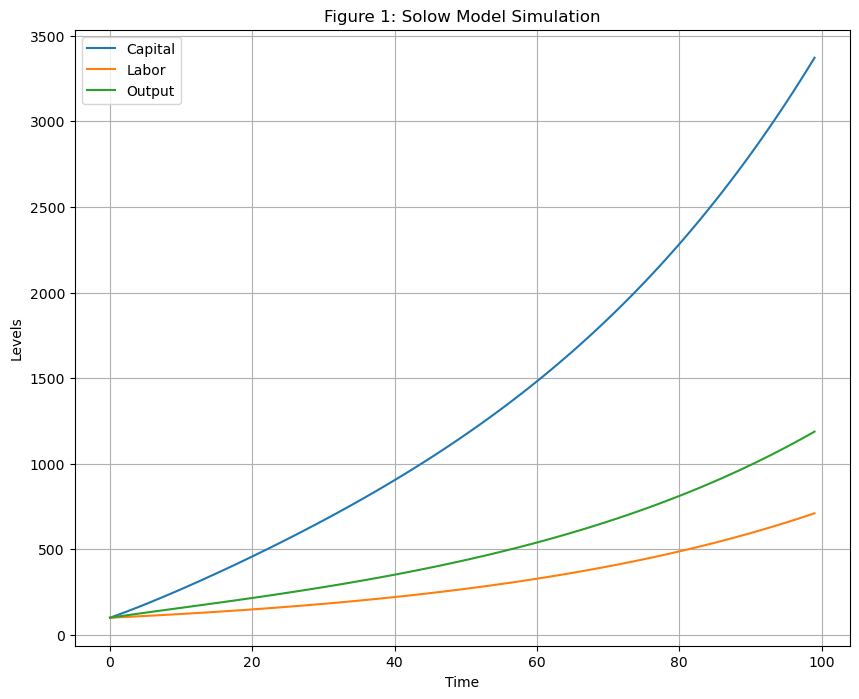

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Parameters
# Define parameters for the extended Solow model with technological growth
alpha = 0.33  # Capital's output elasticity
s = 0.20      # Savings rate
delta = 0.05  # Depreciation rate
n = 0.02      # Labor growth rate
g = 0.02      # Technological growth rate
K0 = 100      # Initial capital stock
L0 = 100      # Initial labor force
T = 100       # Number of time periods to simulate

# Initialize arrays to store the time series of capital, labor, and output
K = np.zeros(T)
L = np.zeros(T)
Y_base = np.zeros(T)
K[0] = K0
L[0] = L0

# Simulation
for t in range(T-1):
    Y_base[t] = K[t]**alpha * L[t]**(1-alpha)  # Production function
    K[t+1] = s * Y_base[t] + (1 - delta) * K[t]  # Capital accumulation
    L[t+1] = (1 + n) * L[t]  # Population growth

# Output in the last period
Y_base[T-1] = K[T-1]**alpha * L[T-1]**(1-alpha)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(K, label='Capital')
plt.plot(L, label='Labor')
plt.plot(Y_base, label='Output')
plt.title('Figure 1: Solow Model Simulation')
plt.xlabel('Time')
plt.ylabel('Levels')
plt.legend()
plt.grid(True)  # Add grid
plt.show()


In [58]:

# Numerical solution for the steady state of capital per capita
def steady_state_k_scalar(k):
    # Avoid negative or zero capital computations
    if k <= 0:
        return float('inf')
    # Calculate output per capita
    y_per_capita = k**alpha
    # Investment minus the sum of depreciation and dilution by population growth
    return s * y_per_capita - (delta + n) * k

# Solving using root_scalar with bracket method, providing a range where the root is expected
result = root_scalar(steady_state_k_scalar, bracket=[0.1, 100], method='brentq')
print("Steady state capital per capita (k^*):", format(result.root, '.10f'))

Steady state capital per capita (k^*): 4.7917643950


# The Extended Solow Model

The extended Solow model including technological growth, we focus on the steady state of capital per effective worker ($k$), using the model's fundamental equations.

### Fundamental Equations of the Extended Solow Model:
1. **Production Function**:
   $$
   Y = K^\alpha (AL)^{1-\alpha}
   $$
   Here, $Y$ represents total output, $K$ is capital, $L$ is labor, $A$ is the level of technology, and $\alpha$ (0 < $\alpha$ < 1) is the elasticity of output with respect to capital. The introduction of $A$ in the production function is the key extension for the basic model with no technological growth. In equation (4) of the extended model we see the development of the technological level over time - which is determined by the exogenous growth rate in technology (g).

2. **Capital Accumulation Equation**:
   $$
   \dot{K} = sY - \delta K
   $$
   where $s$ denotes the savings rate, and $\delta$ is the rate of capital depreciation.

3. **Population Growth**:
   $$
   L_{t+1} = (1+n) L_t,\, -1 < n
   $$
   where $n$ is the growth rate of the labor force.

4. **Technological Development** (with constant technological growth rate, $g$):
   $$
   A_{t+1} = (1+g) A_t,\, 0 < g < 1
   $$
   Here $g$ represents the rate of technological advancement.

5. **Capital per Effective Worker** ($k = \frac{K}{AL}$):
   The dynamics of capital per effective worker are captured by:
   $$
   \dot{k} = \frac{\dot{K}}{AL} - \frac{K\dot{(AL)}}{(AL)^2} = sk^\alpha - (n + g + \delta) k
   $$

# The Extended Solow Model: analytical solution
### Solution for the Steady State ($k^*$):
To find the steady state, where $\dot{k} = 0$, we solve:
$$
0 = sk^\alpha - (n + g + \delta) k
$$
This can be rearranged as:
$$
sk^\alpha = (n + g + δ) k
$$
$$
k^{\alpha-1} = \frac{n + g + δ}{s}
$$
$$
k^* = \left(\frac{s}{n + g + \delta}\right)^{\frac{1}{1-\alpha}}
$$

This $k^*$ represents the steady-state level of capital per effective worker, balancing investments against the combined effects of depreciation, labor force expansion, and technological advancement.

### Output per Effective Worker in Steady State ($y^*$):
Utilizing the per-effective-worker production function $y = k^\alpha$:
$$
y^* = (k^*)^\alpha = \left(\left(\frac{s}{n + g + δ}\right)^{\frac{1}{1-\alpha}}\right)^\alpha = \left(\frac{s}{n + g + δ}\right)^{\frac{\alpha}{1-\alpha}}
$$
Agan we find that the steady state level of GDP/capita (and capital/capita) depends positively on the savings rate. Thus, this result is the same with and without technological growth. However, with technological growth we allow for a higher level og GDP/capita. 

In the above expression it is important that the steady state level is in "per effective" worker, which explains why technological growth contributes negatively to the steady state level. However, when looking at the GDP/capita we find a higher level with technological - which is the relevant variabel to compare with the situation without technological growth.

# The Extended Solow model: numerical solution

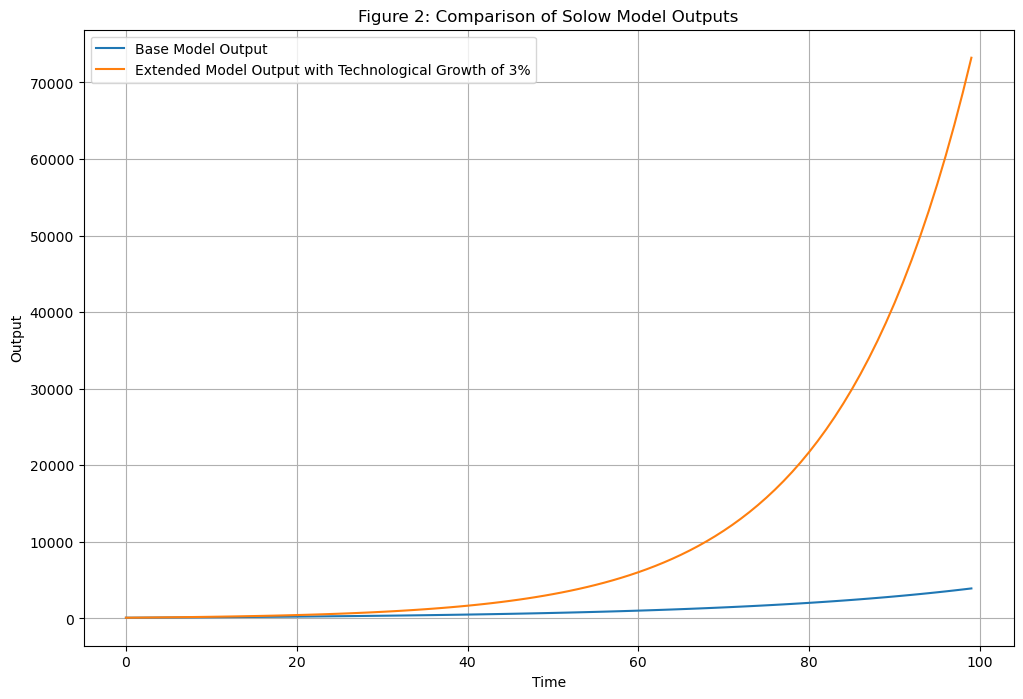

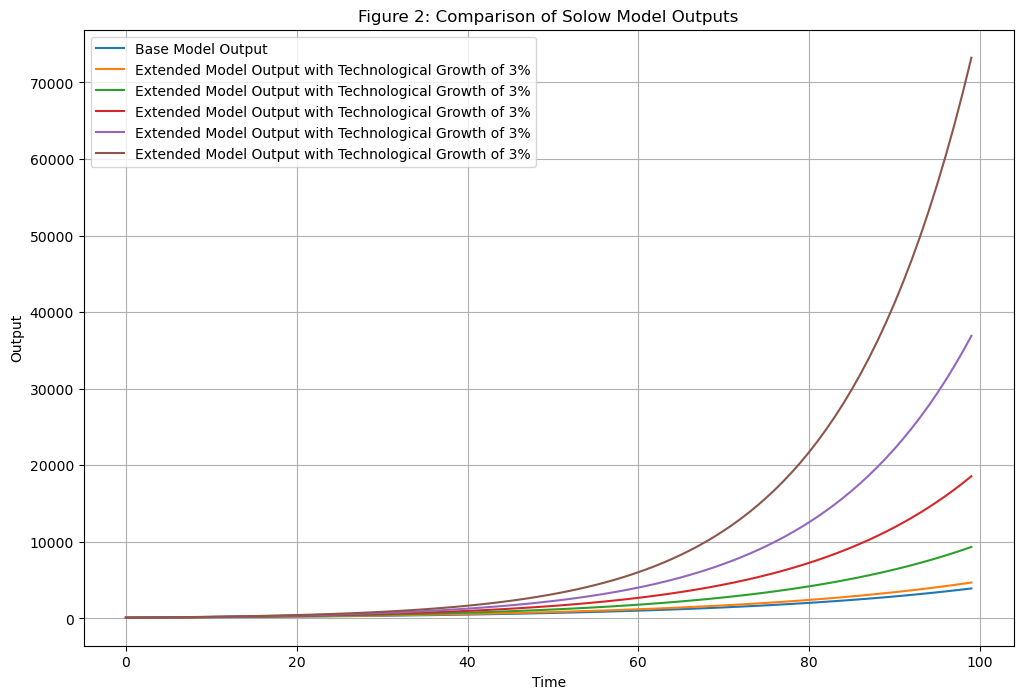

In [82]:
# Parameters already defined above
T = 100       # Number of time periods to simulate

# Initialize arrays to store the time series
K = np.zeros(T)
L = np.zeros(T)
A = np.zeros(T)
Y= np.zeros(T)
Y_base = np.zeros(T)
Y_ext = np.zeros(T)

K[0] = 100    # Initial capital stock
L[0] = 100    # Initial labor force
A[0] = 1      # Initial technology level

# Simulation with technology
for t in range(T-1):
    Y_base[t] = K[t]**alpha * L[t]**(1-alpha)  # Basic production function
    Y_ext[t] = A[t] * K[t]**alpha * L[t]**(1-alpha)  # Extended production function with technology
    K[t+1] = s * Y_ext[t] + (1 - delta) * K[t]  # Capital accumulation
    L[t+1] = (1 + n) * L[t]  # Population growth
    A[t+1] = (1 + g) * A[t]  # Technological growth

# Output in the last period
Y_base[T-1] = K[T-1]**alpha * L[T-1]**(1-alpha)
Y_ext[T-1] = A[T-1] * K[T-1]**alpha * L[T-1]**(1-alpha)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(Y_base, label='Base Model Output')
plt.plot(Y_ext, label='Extended Model Output with Technological Growth of 3%')
plt.title('Figure 2: Comparison of Solow Model Outputs')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)  # Add grid
plt.show()

# Parameters already defined above
T = 100       # Number of time periods to simulate

# Initialize arrays to store the time series
K = np.zeros(T)
L = np.zeros(T)
A = np.zeros(T)
Y_base = np.zeros(T)
Y_ext = np.zeros((T, 5))  # Array to store output for different growth rates
growth_rates = [ 0.01, 0.015, 0.02, 0.025, 0.030]  # Different growth rates

K[0] = 100    # Initial capital stock
L[0] = 100    # Initial labor force
A[0] = 1      # Initial technology level

# Simulation with technology for different growth rates
for i, g in enumerate(growth_rates):
    for t in range(T-1):
        Y_base[t] = K[t]**alpha * L[t]**(1-alpha)  # Basic production function
        Y_ext[t, i] = A[t] * K[t]**alpha * L[t]**(1-alpha)  # Extended production function with technology
        K[t+1] = s * Y_ext[t, i] + (1 - delta) * K[t]  # Capital accumulation
        L[t+1] = (1 + n) * L[t]  # Population growth
        A[t+1] = (1 + g) * A[t]  # Technological growth

    # Output in the last period
    Y_base[T-1] = K[T-1]**alpha * L[T-1]**(1-alpha)
    Y_ext[T-1, i] = A[T-1] * K[T-1]**alpha * L[T-1]**(1-alpha)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(Y_base, label='Base Model Output')
plt.plot(Y_ext, label='Extended Model Output with Technological Growth of 3%')
plt.title('Figure 2: Comparison of Solow Model Outputs')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)  # Add grid
plt.show()


In [60]:
def find_per_capita_steady_state(s, alpha, delta, n, g=None):
    """
    Calculates the steady state of capital per capita or per efficiency unit.
    """
    growth_rate = delta + n if g is None else delta + n + g
    k_star = (s / growth_rate) ** (1 / (1 - alpha))
    return k_star

# Using defined parameters
k_star_basic = find_per_capita_steady_state(s, alpha, delta, n)
k_star_extended = find_per_capita_steady_state(s, alpha, delta, n, g)

print("Steady State Capital per capita (Basic Solow):", k_star_basic)
print("Steady State Capital per efficiency unit (Extended Solow):", k_star_extended)


Steady State Capital per capita (Basic Solow): 4.7917643949809685
Steady State Capital per efficiency unit (Extended Solow): 2.813834181477653


The results indicate that incorporating technological growth into the Solow model leads to a lower steady state capital per effective capita (𝑘=3.29 compared to the model without technological growth k=4.79. This suggests that technological advancements make the economy more efficient, requiring less capital per effective worker to maintain the same output levels. For this comparison, remember that tehcnological growth contributes negatively to the per "effective worker" but not to the per "worker" steady state level.

# Comparative analysis of convergence towards steady state


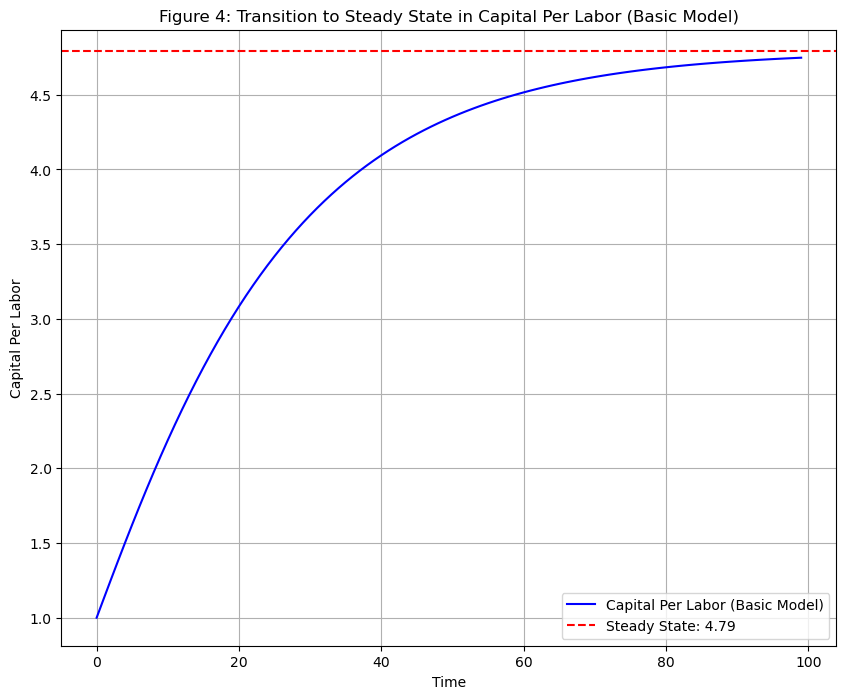

In [84]:
# Simulation for the Basic Solow Model
for t in range(T-1):
    Y[t] = K[t]**alpha * L[t]**(1-alpha)  # Basic production function
    K[t+1] = s * Y[t] + (1 - delta) * K[t]  # Capital accumulation
    L[t+1] = (1 + n) * L[t]  # Population growth
    k_per_capita[t] = K[t] / L[t]  # Calculate capital per labor at each time step

# Final period output and capital per capita
Y[T-1] = K[T-1]**alpha * L[T-1]**(1-alpha)
k_per_capita[T-1] = K[T-1] / L[T-1]

# Finding steady state for the basic model
def steady_state_basic(k):
    if k <= 0:
        return float('inf')
    y_per_capita = k**alpha
    return s * y_per_capita - (delta + n) * k

# Solving for steady state using root_scalar
result_basic = root_scalar(steady_state_basic, bracket=[0.1, 100], method='brentq')
steady_state_k_basic = result_basic.root

# Plot for the basic model
plt.figure(figsize=(10, 8))
plt.plot(k_per_capita, label='Capital Per Labor (Basic Model)', color='blue')
plt.axhline(y=steady_state_k_basic, color='red', linestyle='--', label=f'Steady State: {steady_state_k_basic:.2f}')
plt.title('Figure 4: Transition to Steady State in Capital Per Labor (Basic Model)')
plt.xlabel('Time')
plt.ylabel('Capital Per Labor')
plt.legend()
plt.grid(True)  # Add grid
plt.show()



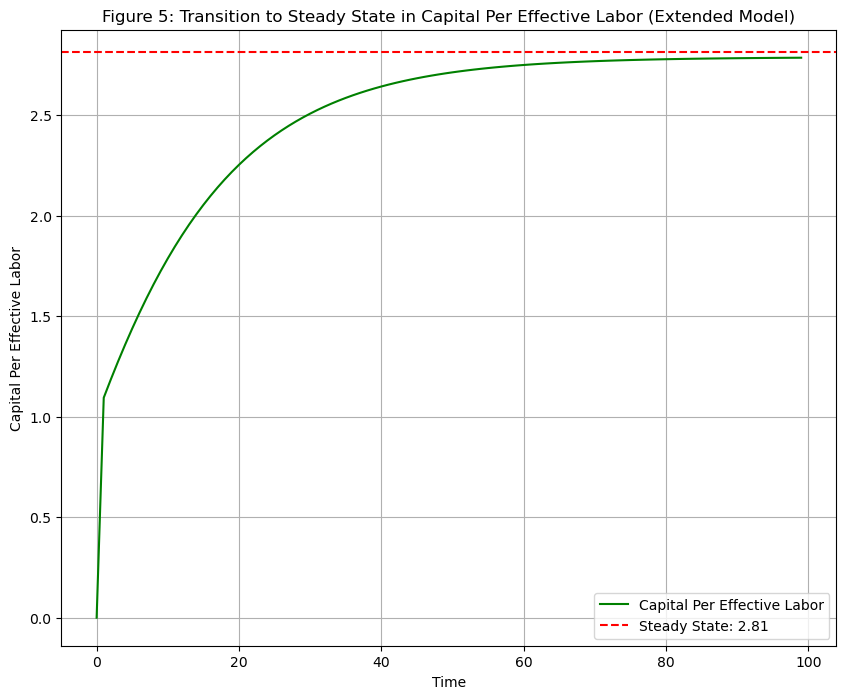

In [85]:
# Initialize arrays to store the time series of capital, effective labor (A * L), and output
K = np.zeros(T)
AL = np.zeros(T)
Y = np.zeros(T)
k_per_capita = np.zeros(T)
K[0] = K0
AL[0] = L0  # Start with initial labor adjusted by initial technology level A0, assumed to be 1

# Simulation for the extended model
for t in range(1, T):
    Y[t-1] = K[t-1]**alpha * AL[t-1]**(1-alpha)  # Production function with technology
    K[t] = s * Y[t-1] + (1 - delta) * K[t-1]  # Capital accumulation
    AL[t] = AL[t-1] * (1 + n) * (1 + g)  # Effective labor growth due to both population and technological progress
    k_per_capita[t] = K[t] / AL[t]  # Calculate capital per effective labor at each time step

# Output in the last period
Y[T-1] = K[T-1]**alpha * AL[T-1]**(1-alpha)

# Calculate the steady state value of k per effective labor analytically
steady_state_k = ((s / (delta + n + g))**(1 / (1 - alpha)))

# Plotting the transition to steady state in capital per effective labor
plt.figure(figsize=(10, 8))
plt.plot(k_per_capita, label='Capital Per Effective Labor', color='green')
plt.axhline(y=steady_state_k, color='red', linestyle='--', label=f'Steady State: {steady_state_k:.2f}')
plt.title('Figure 5: Transition to Steady State in Capital Per Effective Labor (Extended Model)')
plt.xlabel('Time')
plt.ylabel('Capital Per Effective Labor')
plt.legend()
plt.grid(True)  # Add grid
plt.show()


# Effect of exogenous changes to the savings rate


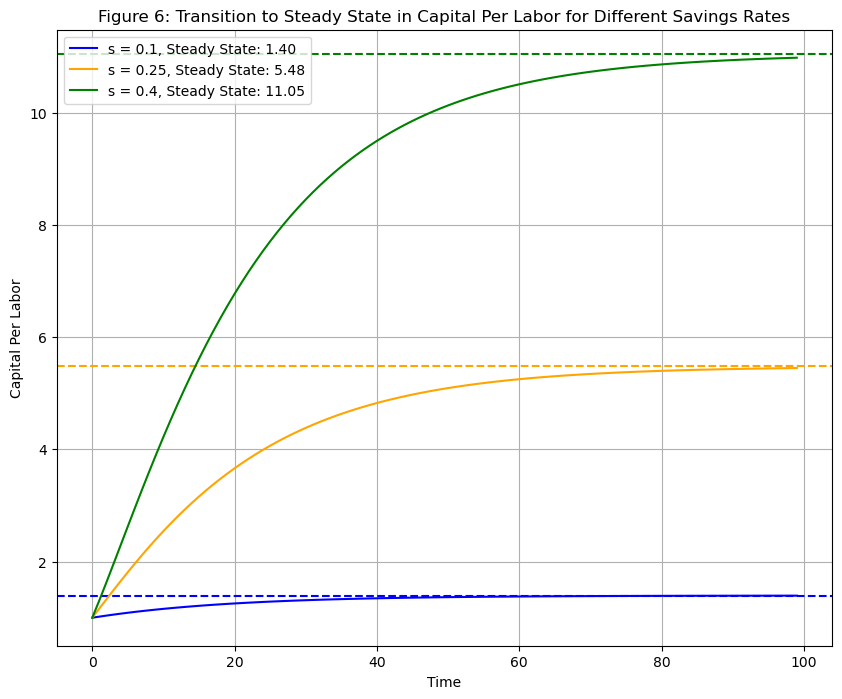

In [72]:
# Define different savings rates to simulate
s_values = [0.1, 0.25, 0.4]  # Different values of savings rate

plt.figure(figsize=(10, 8))

# Simulation for each savings rate
for s in s_values:
    K = np.zeros(T)
    L = np.zeros(T)
    K[0] = K0
    L[0] = L0
    k_per_capita = np.zeros(T)

    # Simulate the model
    for t in range(T-1):
        Y = K[t]**alpha * L[t]**(1-alpha)  # Production function
        K[t+1] = s * Y + (1 - delta) * K[t]  # Capital accumulation
        L[t+1] = (1 + n) * L[t]  # Population growth
        k_per_capita[t] = K[t] / L[t]  # Calculate capital per labor at each time step

    # Final period output and capital per capita
    k_per_capita[T-1] = K[T-1] / L[T-1]

    # Solve for steady state using analytical solution
    steady_state_k = ((s / (delta + n))**(1 / (1 - alpha)))

    # Plot results for this savings rate
    if s == 0.1:
        color = 'blue'
    elif s == 0.25:
        color = 'orange'
    elif s == 0.4:
        color = 'green'
    else:
        color = 'red'
    
    plt.plot(k_per_capita, label=f's = {s}, Steady State: {steady_state_k:.2f}', color=color)
    plt.axhline(y=steady_state_k, color=color, linestyle='--')

# Add details to the plot
plt.title('Figure 6: Transition to Steady State in Capital Per Labor for Different Savings Rates')
plt.xlabel('Time')
plt.ylabel('Capital Per Labor')
plt.legend()
plt.grid(True)
plt.show()


The development of the capital/capita level (developing similarly to GDP/capita) increase with the savings level. This is because an increased savings rate accumulates more capital, which means it will requrire a higher level of capital before savings are equal to depreciation of capital (the classic Solow model intuition from Macroeconomics I).

# Conclusion and discussion


The Solow model, fundamental in economic growth theory, primarily explores the impact of capital accumulation and labor growth on long-term economic progress. Traditionally, it suggests a steady state where capital accumulation is offset by depreciation and labor growth. However, without factors such as technological progress, it does not account for sustained per capita economic growth beyond this steady state.

**Incorporating Technological Growth (extended model)**

By extending the Solow model to include a technological growth rate, g, which exponentially increases the technology factor A, the model now accommodates ongoing improvements in production efficiency. This extension not only boosts output by making capital and labor more effective but also allows for continuous output growth, even when the rates of capital and labor inputs remain constant. Thus, countries with higher technological growth will converge to higher level of capital/capita (and GDP/capita). Using GDP/capita as a proxy for a country's living standard this implies higher living standard for countries with higher technological growth. This can especially be seen in figure 3, where we saw the effect of varying technological growth rates from 1-3% compared to a basic Solow model with no technological growth (g=0%). Here we found that technological growth leads to significantly higher levels of output in the economy, which allows for higher consumption and investments into capital for the same savings rate.

**Effect of increased savings**

Similarly, in figure 6 we found that countries with higher saving rates converge toward a higher level of capital/capita (and GDP/capita). Thus, in addition to improving technological growth countries can acheive higher level of wealth by incentivizing it's citizens to save rather than consume. We find that an increase in the savings rate from 10% to 40% increases the capital/capital level by a factor of 8 over 100 periods.

**Disucssion**

It is important to note that higher GDP/capita is not the welfare maximizing variable in the solow model. This is the consumpiton/capita, which only increases with savings untill the golden rule savings rate is reached. Thus, a further study could incoroperate the consumption/capita level to make a more relevant policy recommendation for the desirable savings rate to incentivize for. On the other hand, the extended model version shows that technological growth is good for a country. Thus, it could be advisablew to allocate resources to the R&D sector to reach higher level of continous technological growth. This could be investigated further by looking at a endogenous growth model instead of the exogenous growth model we have looked at here.

